# Introduction

Secrets should be stored securely to protect private data and prevent people from gaining unauthorized access to your application(s). 

Vault is a token-based storage solution for managing secrets. 

There are four stages of security for Vault:
1. Authentication
2. Validation
3. Authorization
4. Access

We will take a closer look at how Vault authenticates users and manages secrets using Python.

# Learning Objectives

In this lab, you will:
* Configure, launch, and access the Vault UI using the terminal
* Use the Vault Python API (`hvac`) to read, write, and delete key-value secrets in Vault

# Install Vault

Throughout this lab you will be using a tool called **Vault** from Hashicorp.

Before you can use vault on any system, you must install it.

## Your Task

Run the following commands in the terminal to install vault:

```
wget -O- https://apt.releases.hashicorp.com/gpg | gpg --dearmor | sudo tee /usr/share/keyrings/hashicorp-archive-keyring.gpg >/dev/null

echo "deb [signed-by=/usr/share/keyrings/hashicorp-archive-keyring.gpg] https://apt.releases.hashicorp.com $(lsb_release -cs) main" | sudo tee /etc/apt/sources.list.d/hashicorp.list

sudo apt update

sudo apt install vault
```

You can verify that it was installed properly by running the **`vault`** command in a terminal.

This should show a list of commands you can use with the tool.

# Setting up the Dev Server

* Now, you will start the Dev Server for Vault just to get an idea of what the functionalities look like. 
* In reality, this is not very secure, but it is useful for exploring the tool locally.
* Nonetheless, all data is encrypted and stored in-memory for the Dev Server.

## Your Task

Use the `vault server` command with the `-dev` flag to run the vault server in development mode: **`vault server -dev`**

At the end of the output, you should see a warning message that gives us some more information.

Firstly, it informs us that the environment variable should be set. 

This is the address through which you can access Vault locally:

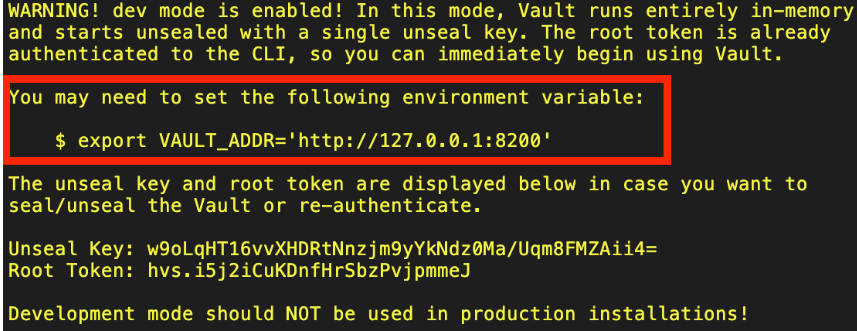

## Set environment variable

Next, you must open a new terminal using **`Terminal > New Terminal`** from the top menu, and run the following shell command to specify port **`8200`** for Vault: **`export VAULT_ADDR='http://127.0.0.1:8200'`**

The unseal key and root token (highlighted below) are also given in the output message:

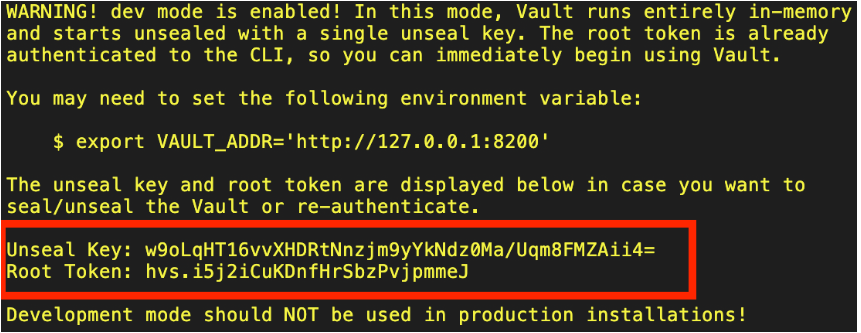

They are used to authenticate the user - the first step of security in Vault. 

The **root token** is regenerated every time you start the server, so be sure to **edit and run the statement below according to the most updated root token** displayed on your terminal: **`export VAULT_TOKEN="YOUR ROOT TOKEN HERE"`**

> *Note: Right-click to copy and paste values in the terminal.*

# Check the Server

It is important to know if the server is running correctly so in this step you will use the **`vault status`** command to check the server status.

## Your Task

Use the **`vault status`** command to check that the server is running: **`vault status`**

The output should look something like this:

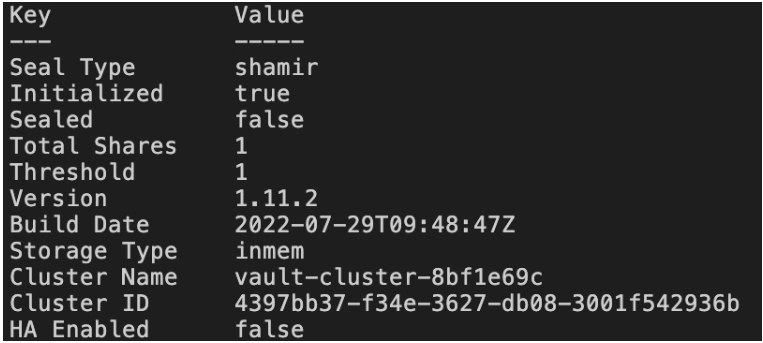

You do not need to know what all this means at the moment - just understand that it shows we have a running vault server to manage your secrets!

# Access the Vault UI

* There are various ways to access Vault. 
* One user-friendly way is to launch the web User Interface (UI) on your local host.



* This will open a new tab in this IDE for the application.
* You will be presented with a logon page. From here, you can input the root token that you copied to the **`VAULT_TOKEN`** environment variable to login.

You can display your token from a terminal with: **`echo $VAULT_TOKEN`**

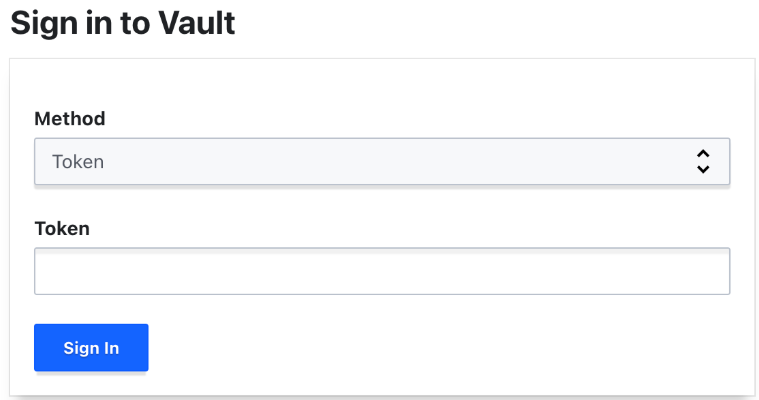

## Vault web UI

Once you are logged in, you can access secrets stored in **`secret/`** by clicking the link:

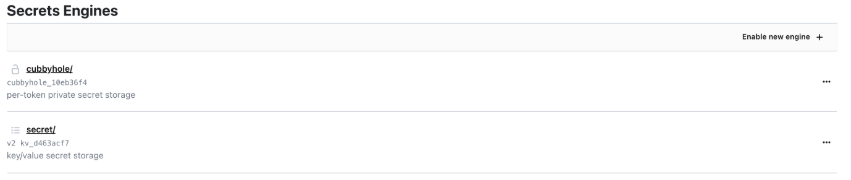

**Alternatively, if you click the button in the top-right corner (highlighted by the yellow box below), you can open the page in a new browser page:**

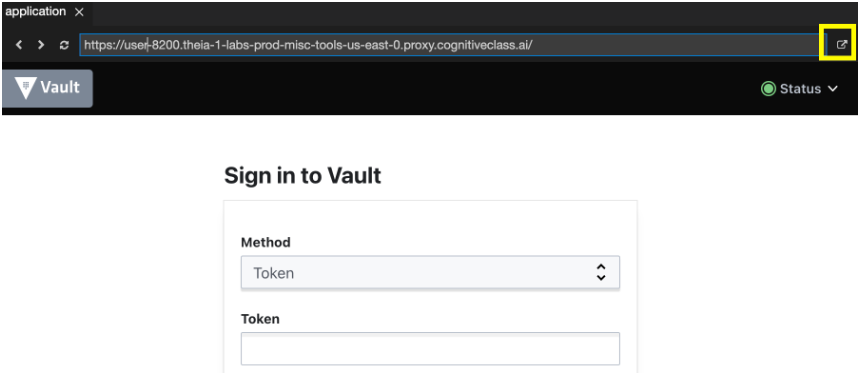

# Installing HVAC

By default, Vault’s dev server includes [KV v2 Secrets Engines](http://https//www.vaultproject.io/docs/secrets/kv/kv-v2) at the path **`secret/`**, storing secrets within its configured physical storage. Secrets are encrypted before writing to backend storage, so it can never decrypt these values without Vault.

As demonstrated in the video, you will learn to read and write secrets to the server using Python with the help of the **`hvac`** library. 

Before we can do this, we must install the Python package **`hvac`** using the Python Package Manager (pip).

## Your Task

Use the **`pip`** command to install the **`hvac`** package with the following command: **`python3 -m pip install hvac`**

> *Note: You can also use the Vault command line instead of the Python API to manage secrets. Learn more about it here.*

# Write Secret to Vault

You are now ready to start using vault by writing secrets to it.

Before you can start, you must first, obtain the Python file that will be used to write, read, and delete secrets from Vault:

## Your Task

1. Use the following **`wget`** command to retrieve the program **`read_write_vault.py`**:

```
wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-CD0267EN-SkillsNetwork/labs/module3/read_write_vault.py
```

2. Let’s open the file in the IDE to take a look at it:

 

## Examine the program

There are four functions in this program:

```
def init_server():
def write_secret(secret_path, key, value):
def read_secret(secret_path):
def delete_secret(secret_path):
```

* First, we will use **`init_server()`** **(line 4)**, which creates a new hvac client instance with the specified URL.
* If you were to run this lab on your own computer, this would be **`http://localhost:8200`** where your Vault dev server is located.
* In the Cloud IDE environment will use the URL from launching the application instead.
* We return the client instance to use later on.

## Writing a secret

Now, try writing a secret! From the video, you know that **`client.secrets.kv.v2.create_or_update_secret()`** can be used to write a key/value pair for the client under the path: **`secret/path`**. 
* We use this in a custom function **`write_secret()`** **(line 12)** that also prints out the information of the new secret created. 
* As outlined in lines **`35-65`**, you can directly call this function.

Use `python3` to call the **`read_write_vault.py`** program passing in the function name **`write_secret`** with the parameters **`myapp alice mypassword`**:
```
python3 read_write_vault.py write_secret myapp alice mypassword
```

This will set the path as **`secret/myapp`** and write the secret key/value pair **`alice=mypassword`** in there.

## Results

The output should look something like this:

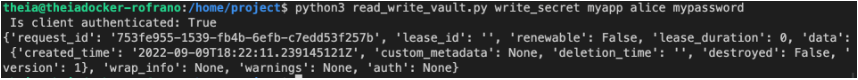

# Double-check Written Secret

After writing the key/value pair, let’s open up the Vault UI to double-check that the secret is stored in the right place:

## Your Task

Go back to the vault UI.



1. Click the **`secret/`** link. This will show you all secrets.

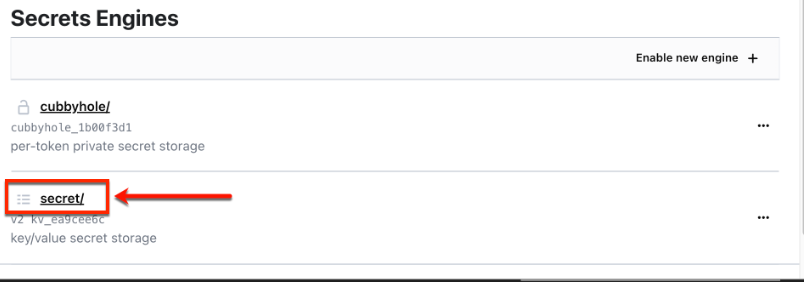

2. Then click the **`myapp/`** link. This will show you secrets under **`myapp`**.

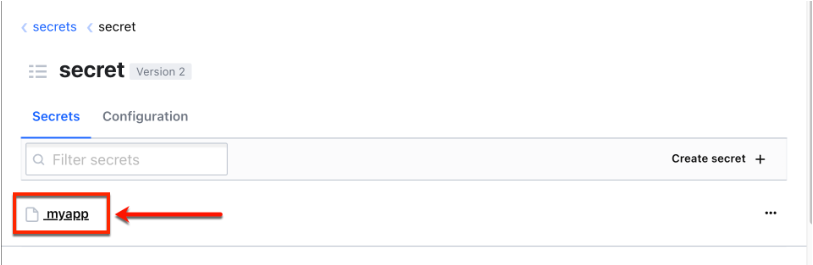

3. You should see the stored secret **`alice`** and when you click the eye icon, you will see the value of **`mypassword`**.

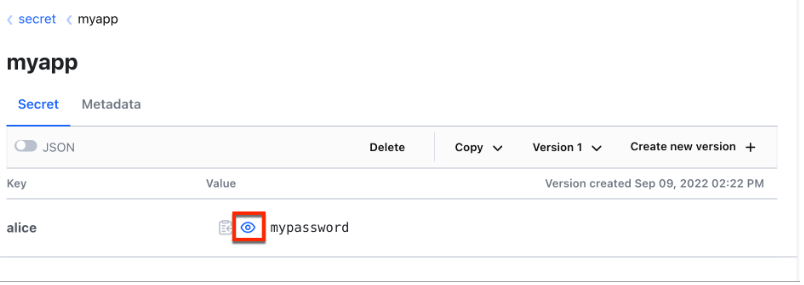

# Read Secret from Vault

In this step you will read the secret back from the vault. 

To do this programmatically with Python, you would use the function **`client.secrets.kv.v2.read_secret_version()`**. 

This has been included in **`read_secret()`** **(line 21)**, which will take in the secret’s path as argument and output the details of the secret read.

## Your Task

You are going to use the same syntax in the terminal to read a secret from the path **`secret/myapp`**.

Use **`python3`** to run the **`read_write_vault.py`** program calling the **`read_secret`** function passing in the parameter **`myapp`**:
```
python3 read_write_vault.py read_secret myapp
```

## Results

The output returns information about all the data stored under **`secret/myapp`**. 

Notably, you can see the key/value pair you just wrote:

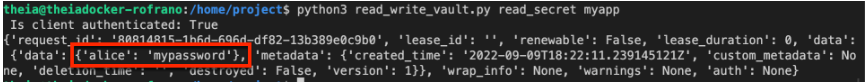

> *Note: If you read from an invalid path, hvac will return an error.*

# Delete Secret from Vault

Deleting secrets from the Vault is also possible with **`client.secrets.kv.v2.delete_latest_version_of_secret()`**, which will delete the latest version of the secret in a certain path that you specify for the function parameter.

You can call the function **`delete_secret()`** **(line 29)** in the terminal with a similar syntax

## Your Task

Use **`python3`** to run the **`read_write_vault.py`** program calling the **`delete_secret`** function passing in the parameter **`myapp`**:

```
python3 read_write_vault.py delete_secret myapp
```

The program does not print or return anything for this function, but you can go back to the Vault UI to check that it has been deleted.

# Double-check Deleted Secret

You can always check what secrets exist by using the Vault web UI, but we will do this programmatically using a python program to check if the secret has been deleted by calling **`read_secret`** again for **`myapp`**.

## Your Task

Use **`python3`** to run the **`read_write_vault.py`** program calling the **`read_secret`** function passing in the parameter **`myapp`**:

```
python3 read_write_vault.py read_secret myapp
```


## Results

You should see an error for **`InvalidPath`**, along with a dictionary containing a key named **“deletion_time”** showing when the secret was deleted:

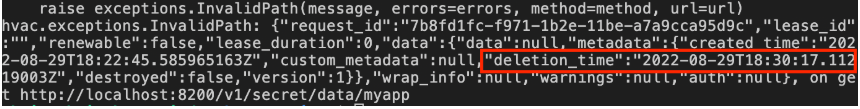


## Check the Vault UI

Revisiting the Vault UI, you can see this change reflected, too.

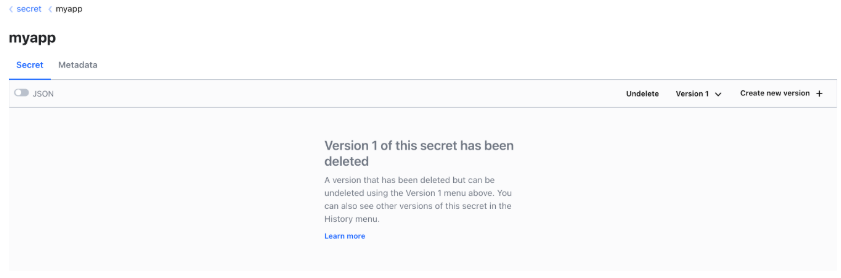

# Conclusion

Congratulations, you have successfully completed the Store Secrets Securely lab.

* In this lab, you learned how to install Hashicorp Vault, create a secret, and store it securely in the vault.
* You also learned how to retrieve a secret from the vault and how to delete secrets from the vault when no longer needed.
* All this was accomplished using Python code so that you can incorporate this code into your next project.

# Next Steps

Almost all projects have secrets of some kind. Now that you know how to use vault, your next challenge is to try and use it on one of your projects to protect credentials or any other secrets and store them securely.